In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv("/content/CROP_YIELD_WHEAT.csv")

In [3]:
df.head()

,District/Year,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1977,1976,1975,1974,1973,1972,1971,1970,1969,1968
0,Gurdaspur,4220,4524,4175,4717,4733,4606,4654,3356,4469,...,2106.0,2095.0,2188.0,1868.0,2015.0,2077.0,2089.0,1955.0,1953.0,1315.0
1,Pathankot,3650,4344,3944,3984,4018,4066,4049,2727,3979,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Amritsar,4451,4763,4533,4813,4866,4948,4478,3914,4869,...,2493.0,2424.0,2276.0,2051.0,2198.0,2749.0,2326.0,2680.0,2342.0,1570.0
3,Tarn Taran,4287,4704,4546,4898,4685,4791,4524,4132,5088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kapurthala,3994,4616,4655,4733,4842,4922,4259,3996,4935,...,2129.0,2148.0,2140.0,1920.0,2127.0,1916.0,2527.0,2065.0,2302.0,1597.0


In [ ]:
df = df.iloc[:, :12]
df.head()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District/Year  23 non-null     object 
 1   2022           23 non-null     int64  
 2   2021           23 non-null     int64  
 3   2020           23 non-null     int64  
 4   2019           23 non-null     int64  
 5   2018           23 non-null     int64  
 6   2017           23 non-null     int64  
 7   2016           23 non-null     int64  
 8   2015           23 non-null     int64  
 9   2014           23 non-null     int64  
 10  2013           23 non-null     int64  
 11  2012           21 non-null     float64
 12  2011           21 non-null     float64
 13  2010           21 non-null     float64
 14  2009           21 non-null     float64
 15  2008           21 non-null     float64
 16  2007           21 non-null     float64
 17  2006           20 non-null     float64
 18  2005        

In [5]:
df.describe()

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1977,1976,1975,1974,1973,1972,1971,1970,1969,1968
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,4014.652174,4804.565217,4940.086957,5117.652174,5016.478261,4978.130435,4553.521739,4190.173913,4809.347826,4679.782609,...,2357.923077,2321.153846,2327.692308,2147.538462,2166.307692,2303.333333,2224.500000,2191.583333,2154.250000,1797.583333
std,561.807360,276.563461,539.808966,420.517388,349.883860,362.849995,211.659433,505.785047,590.488981,275.155816,...,324.133579,226.937159,302.455612,324.982721,353.181583,476.055637,431.223102,431.180084,321.050584,477.548371
min,2475.000000,4145.000000,3944.000000,3984.000000,4018.000000,4066.000000,4049.000000,2727.000000,2594.000000,4121.000000,...,1840.000000,2045.000000,1803.000000,1687.000000,1538.000000,1435.000000,1468.000000,1283.000000,1521.000000,1269.000000
25%,3756.000000,4660.000000,4527.000000,4855.500000,4854.000000,4837.000000,4486.000000,3977.500000,4723.500000,4492.500000,...,2129.000000,2120.000000,2141.000000,1920.000000,1939.000000,2037.500000,2042.750000,1950.750000,1933.250000,1590.250000
50%,4220.000000,4900.000000,5026.000000,5180.000000,5077.000000,5046.000000,4602.000000,4304.000000,4958.000000,4724.000000,...,2424.000000,2338.000000,2276.000000,2115.000000,2137.000000,2308.500000,2132.000000,2229.500000,2224.500000,1708.500000
75%,4390.500000,4966.000000,5371.000000,5425.500000,5261.500000,5200.000000,4674.500000,4516.000000,5087.000000,4825.500000,...,2445.000000,2424.000000,2426.000000,2309.000000,2400.000000,2535.500000,2367.500000,2334.000000,2318.750000,1882.000000
max,4582.000000,5264.000000,5934.000000,5800.000000,5552.000000,5557.000000,4914.000000,4809.000000,5498.000000,5175.000000,...,3160.000000,2823.000000,3001.000000,2929.000000,2922.000000,3310.000000,3279.000000,3040.000000,2674.000000,3136.000000


In [6]:
df.shape

(23, 56)

In [7]:
df.isnull().sum()

,0
District/Year,0
2022,0
2021,0
2020,0
2019,0
2018,0
2017,0
2016,0
2015,0
2014,0


In [11]:
# IMPUTATION

mean_2012 = df['2012'].mean()
print(mean_2012)

df['2012'].fillna({'2012': mean_2012}, inplace=True)

5069.380952380952


<ipython-input-11-81b737073e5e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['2012'].fillna({'2012': mean_2012}, inplace=True)


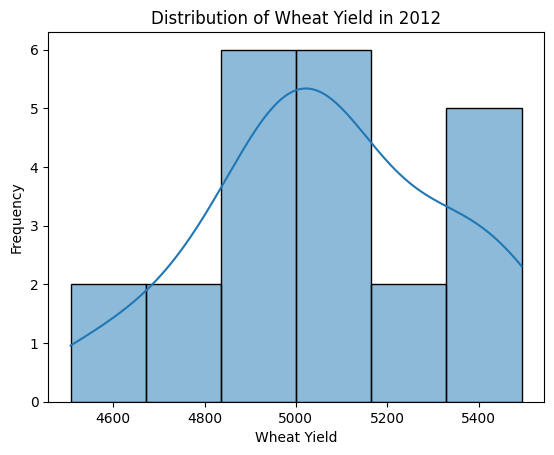

In [12]:
sns.histplot(df['2012'], kde=True)
plt.title('Distribution of Wheat Yield in 2012')
plt.xlabel('Wheat Yield')
plt.ylabel('Frequency')
plt.show()

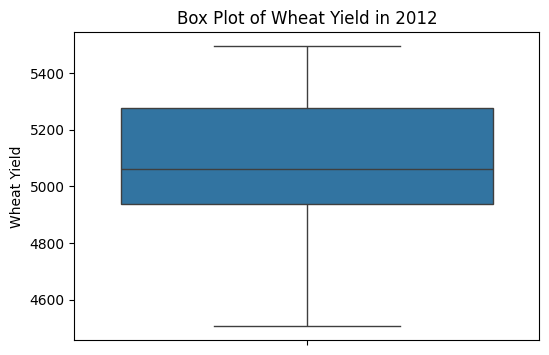

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['2012'])
plt.title('Box Plot of Wheat Yield in 2012')
plt.ylabel('Wheat Yield')
plt.show()

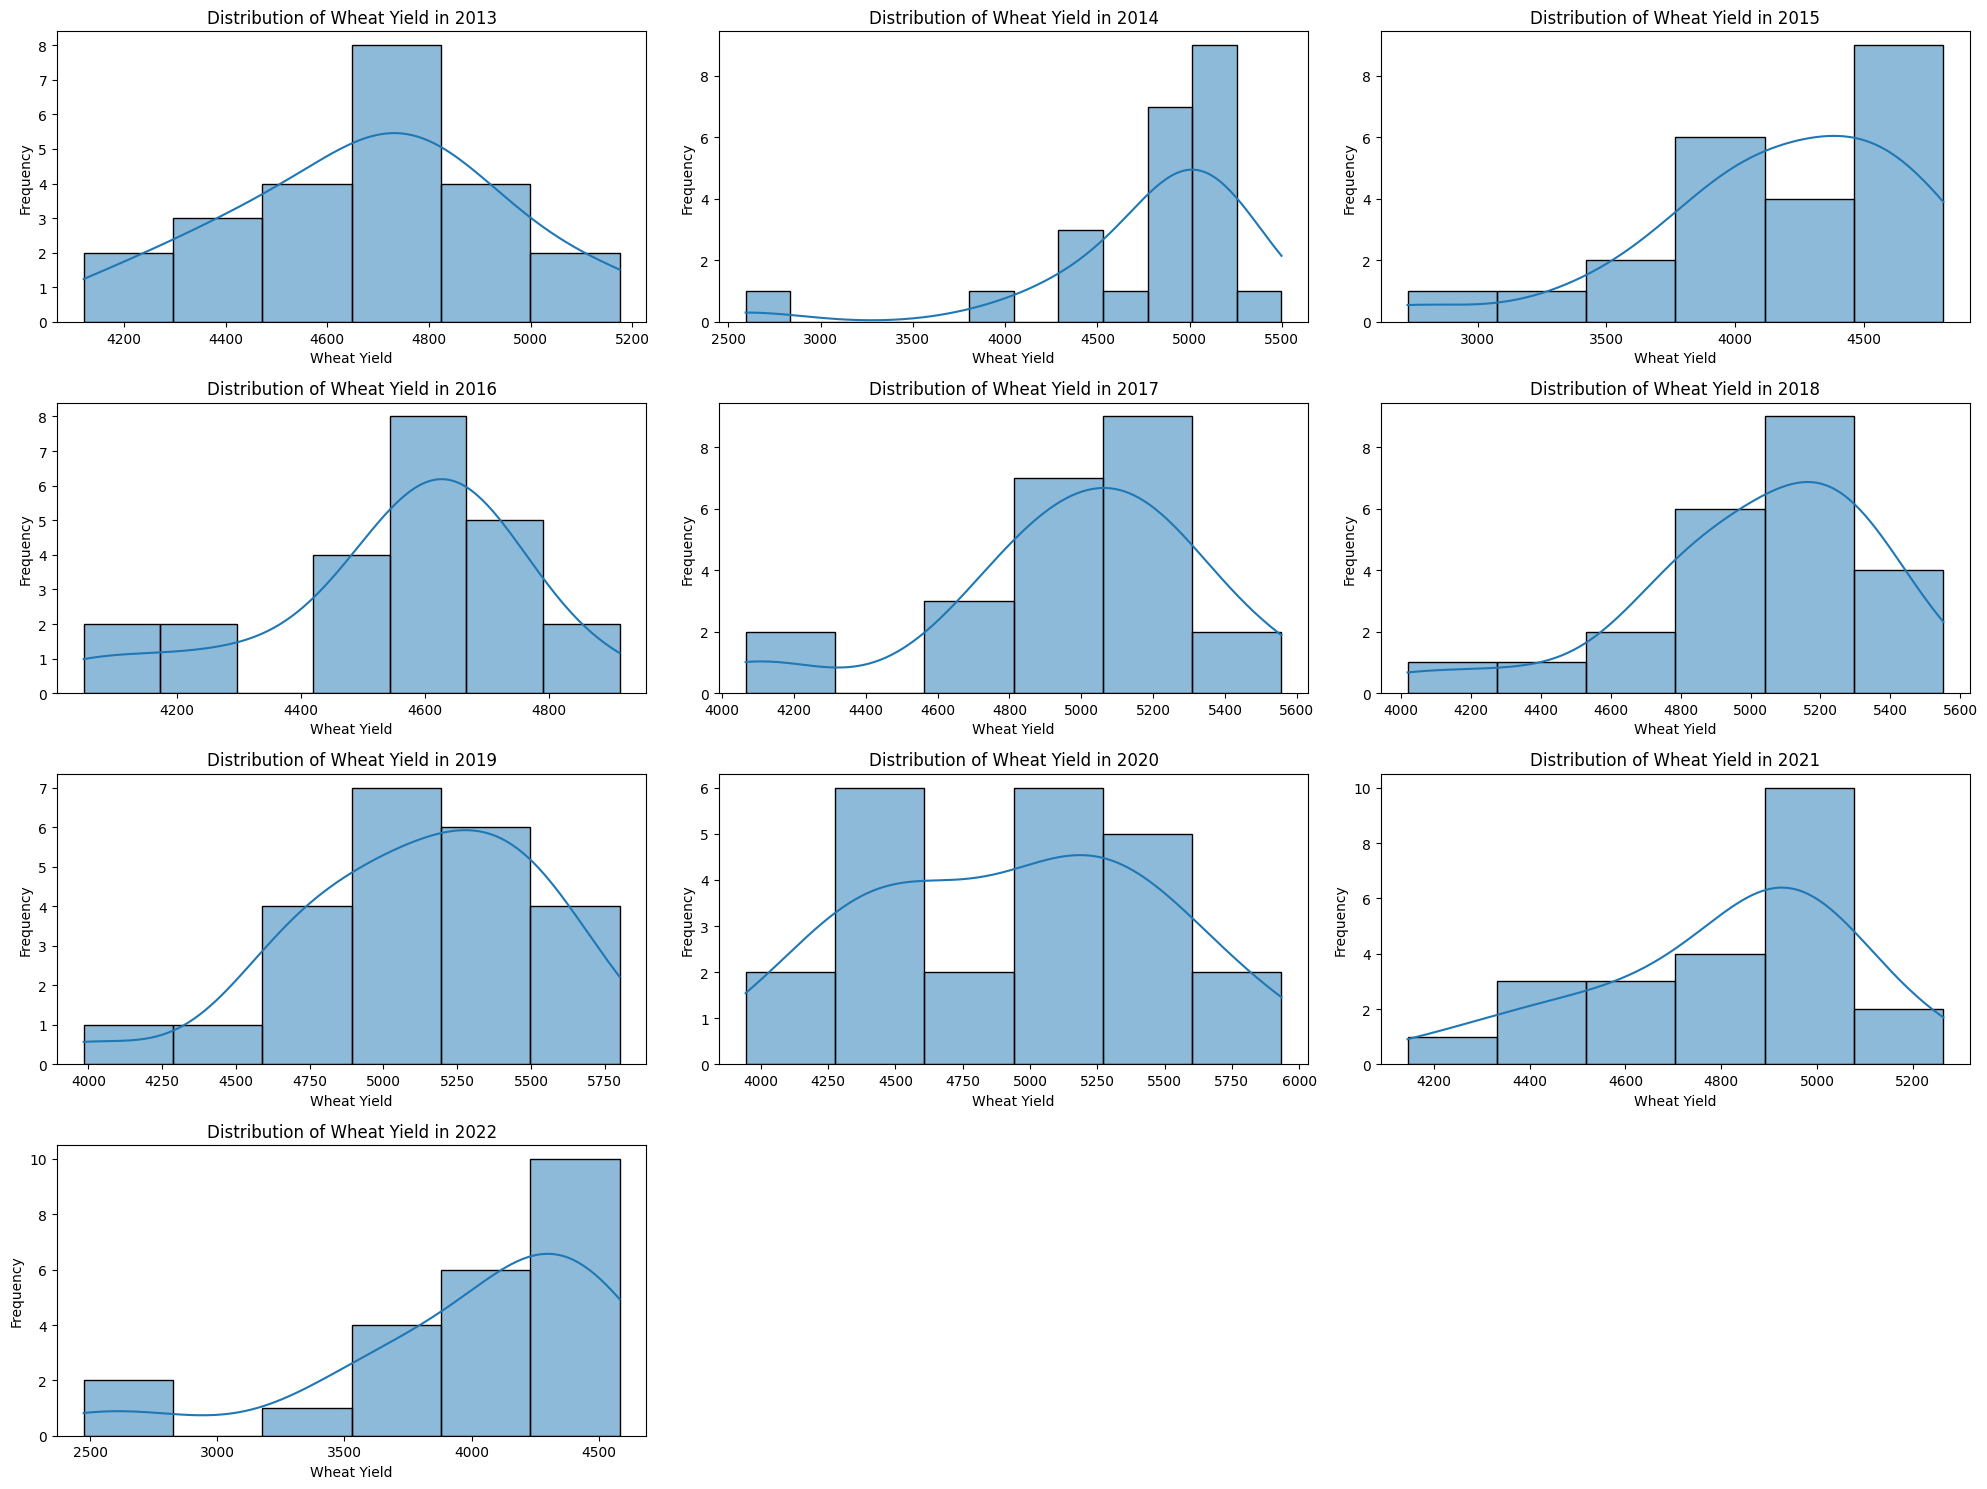

In [14]:
df = df.iloc[:, :12]

plt.figure(figsize=(20, 15))

for i, year in enumerate(range(2013, 2023)):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[str(year)], kde=True)
    plt.title(f"Distribution of Wheat Yield in {year}")
    plt.xlabel('Wheat Yield')
    plt.ylabel('Frequency')

plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()

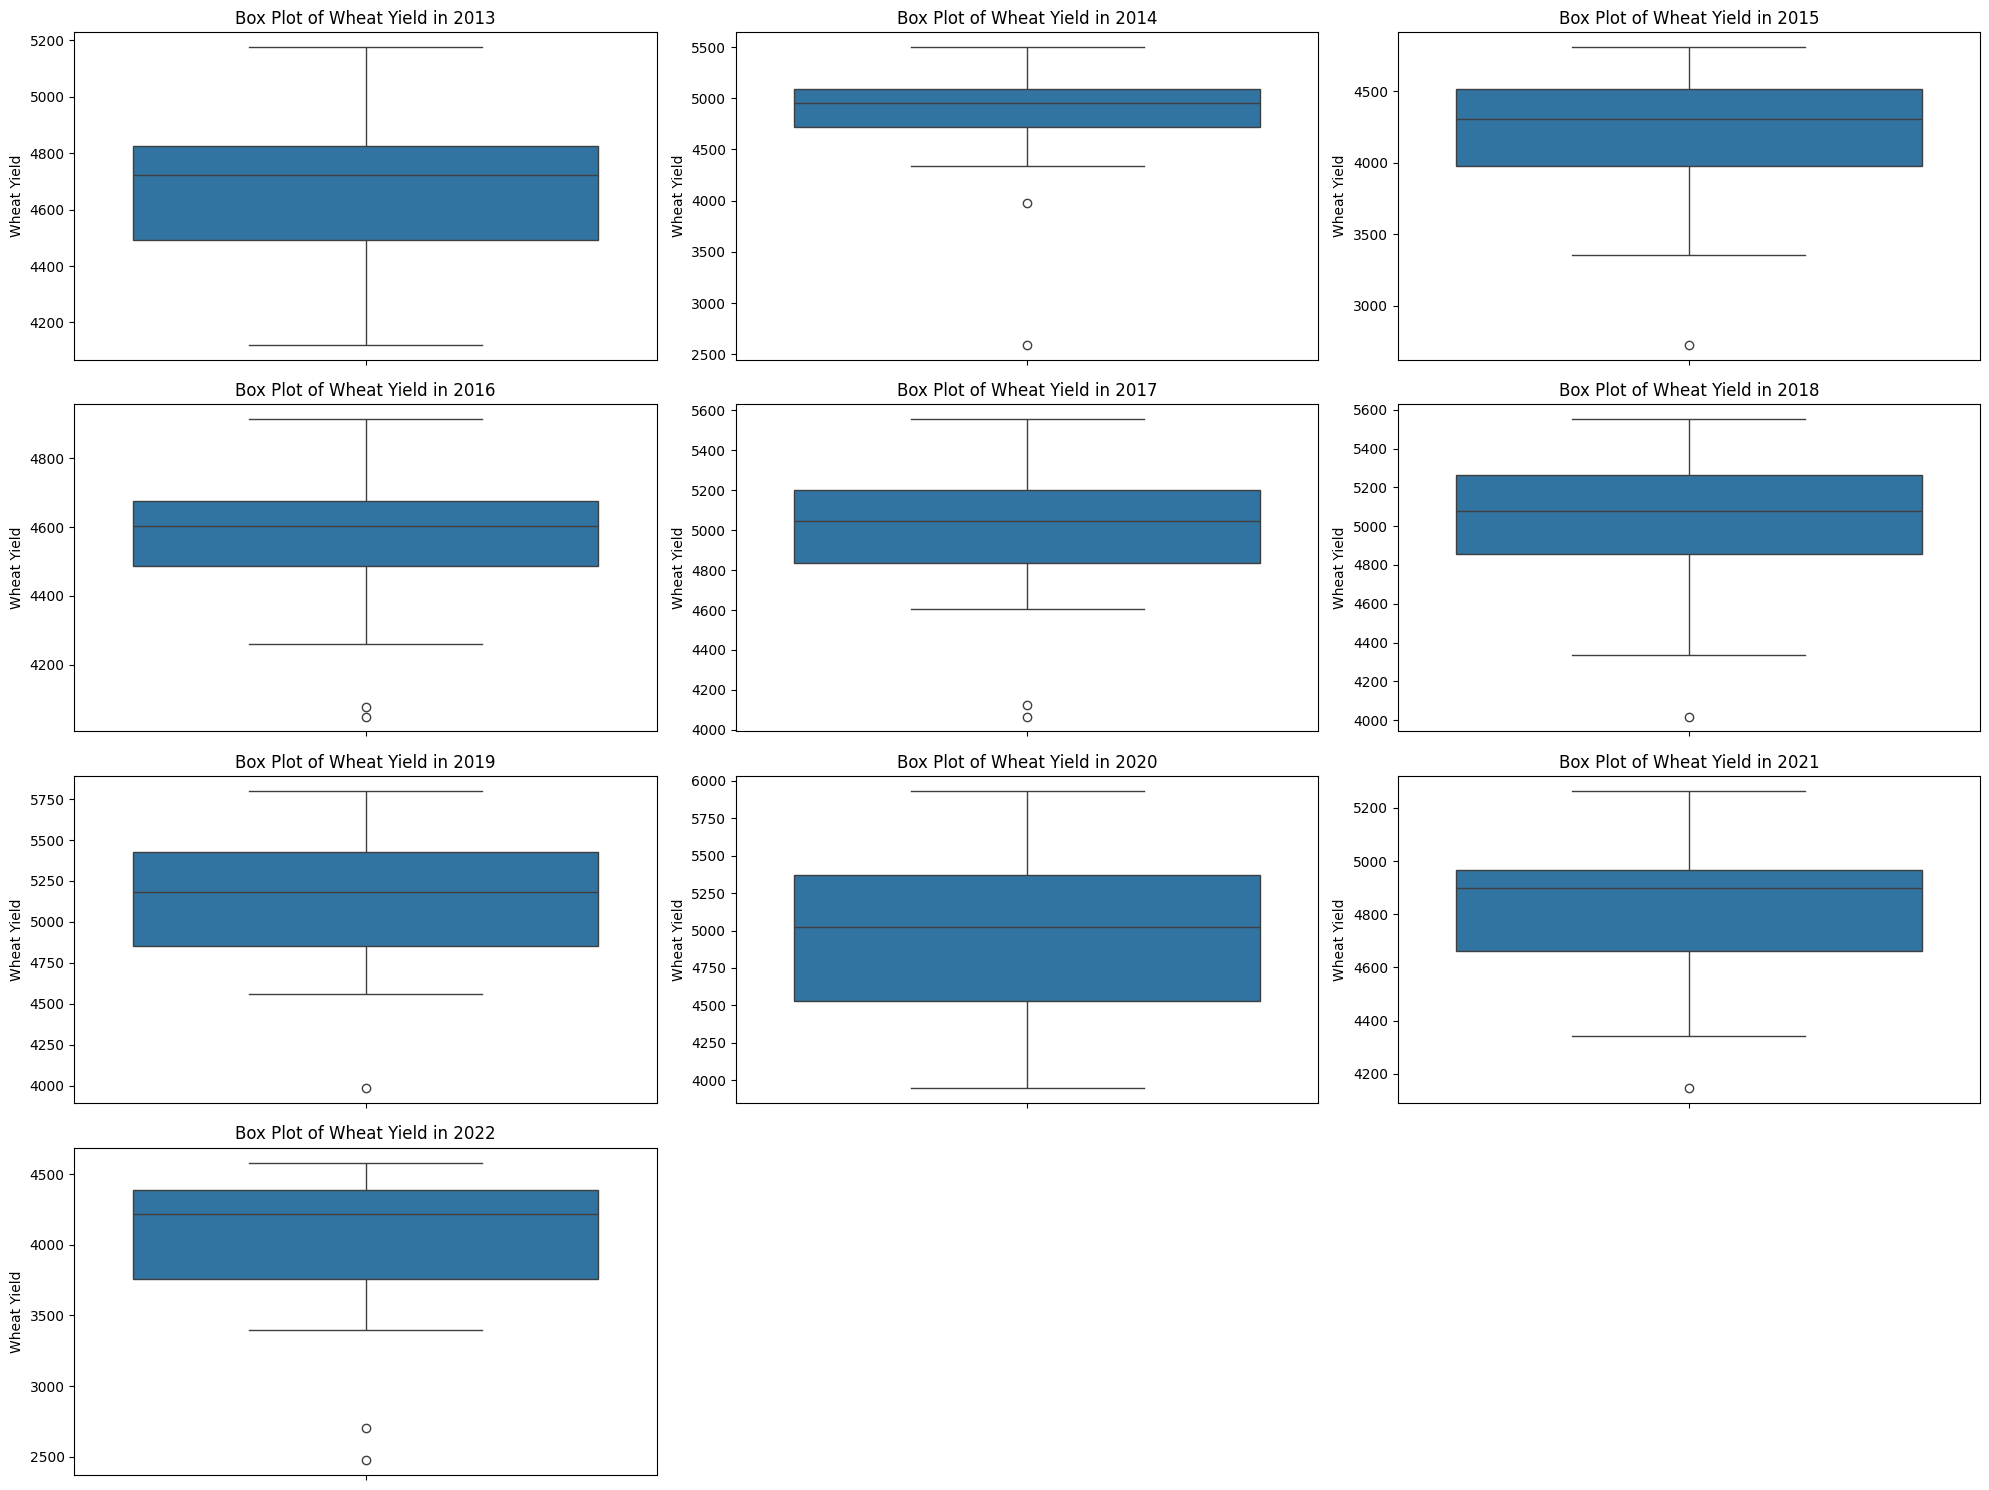

In [15]:
df = df.iloc[:, :12]

plt.figure(figsize=(20, 15))

for i, year in enumerate(range(2013, 2023)):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df[str(year)])
    plt.title(f"Box Plot of Wheat Yield in {year}")
    plt.ylabel('Wheat Yield')

plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()


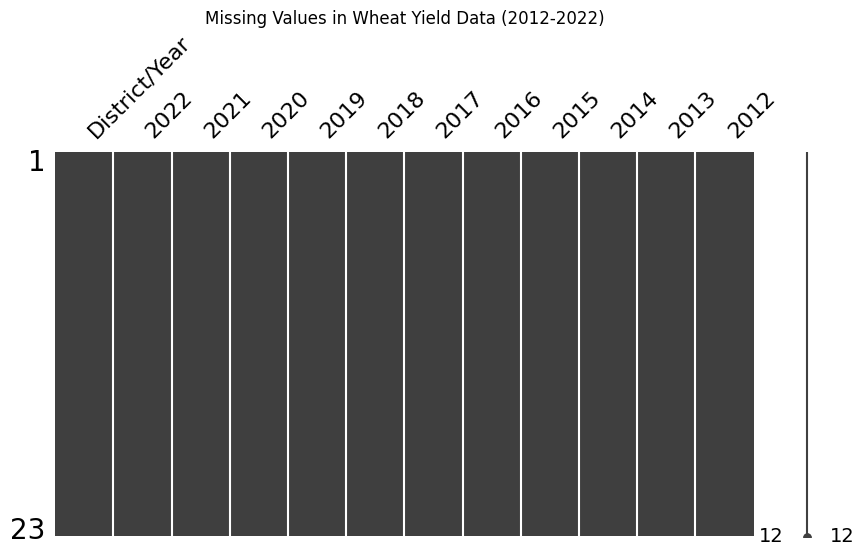

Missing Values Per Year:
 District/Year    0
2022             0
2021             0
2020             0
2019             0
2018             0
2017             0
2016             0
2015             0
2014             0
2013             0
2012             0
dtype: int64


In [16]:
df_10yrs = df.iloc[:, [0] + list(range(-11, 0))]

msno.matrix(df_10yrs, figsize=(10, 5))
plt.title("Missing Values in Wheat Yield Data (2012-2022)")
plt.show()

missing_counts = df_10yrs.isnull().sum()
print("Missing Values Per Year:\n", missing_counts)

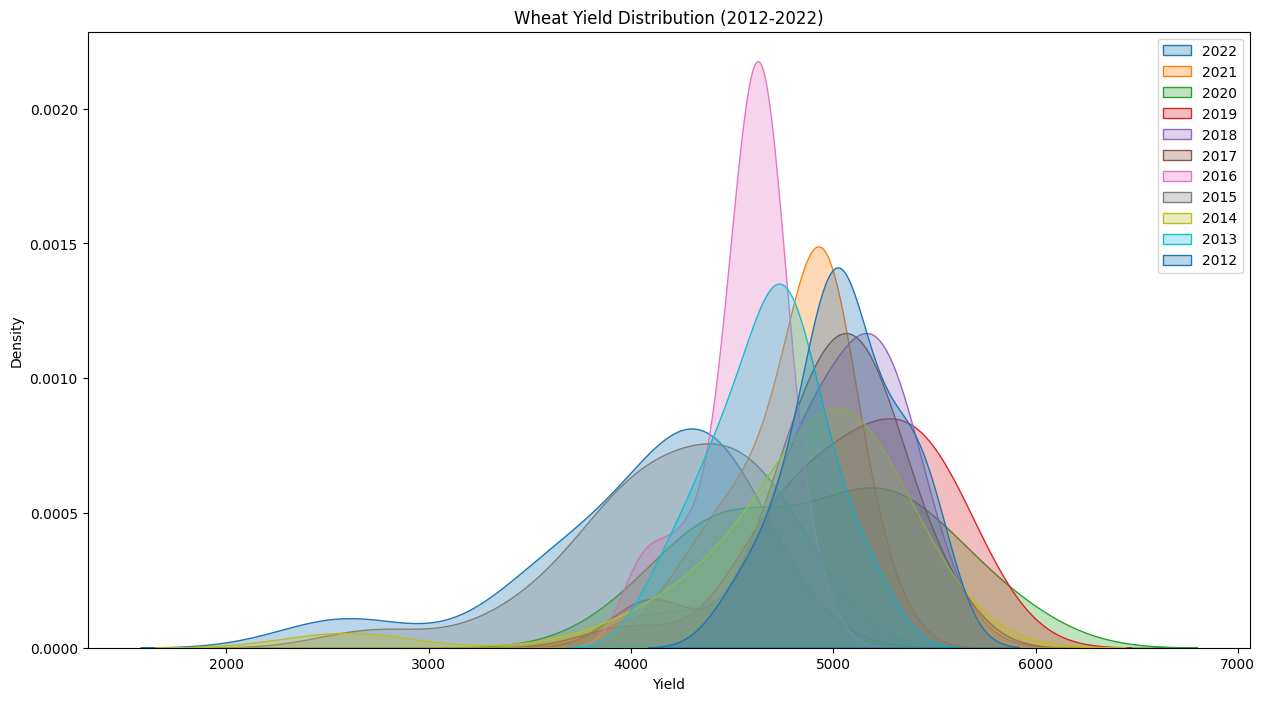

In [17]:
plt.figure(figsize=(15, 8))
for year in df_10yrs.columns[1:]:
    sns.kdeplot(df_10yrs[year], label=year, fill=True, alpha=0.3)

plt.title("Wheat Yield Distribution (2012-2022)")
plt.xlabel("Yield")
plt.ylabel("Density")
plt.legend()
plt.show()

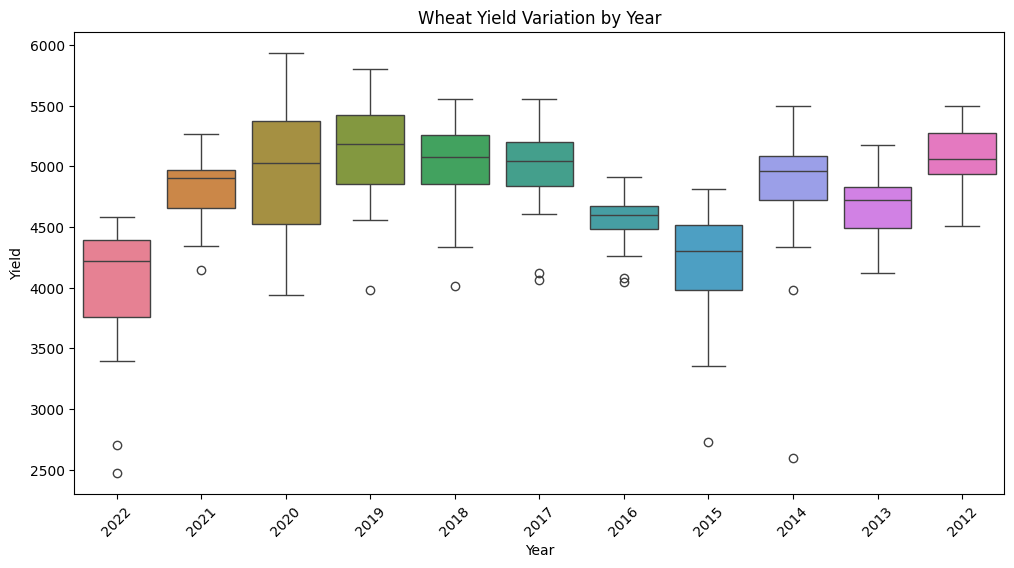

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_10yrs.iloc[:, 1:])
plt.xticks(rotation=45)
plt.title("Wheat Yield Variation by Year")
plt.ylabel("Yield")
plt.xlabel("Year")
plt.show()

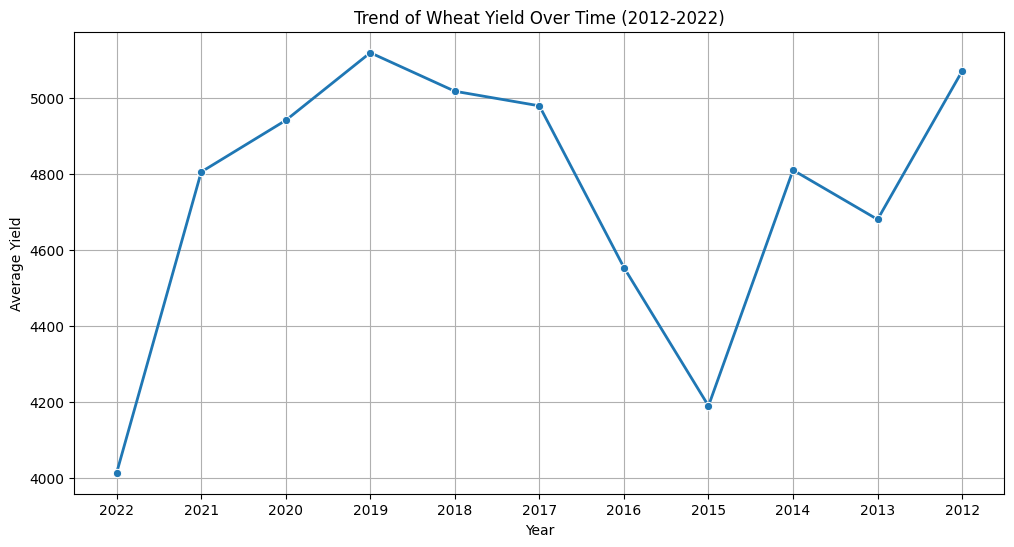

In [19]:
yearly_mean = df_10yrs.iloc[:, 1:].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_mean.index, y=yearly_mean.values, marker="o", linewidth=2)
plt.title("Trend of Wheat Yield Over Time (2012-2022)")
plt.ylabel("Average Yield")
plt.xlabel("Year")
plt.grid()
plt.show()


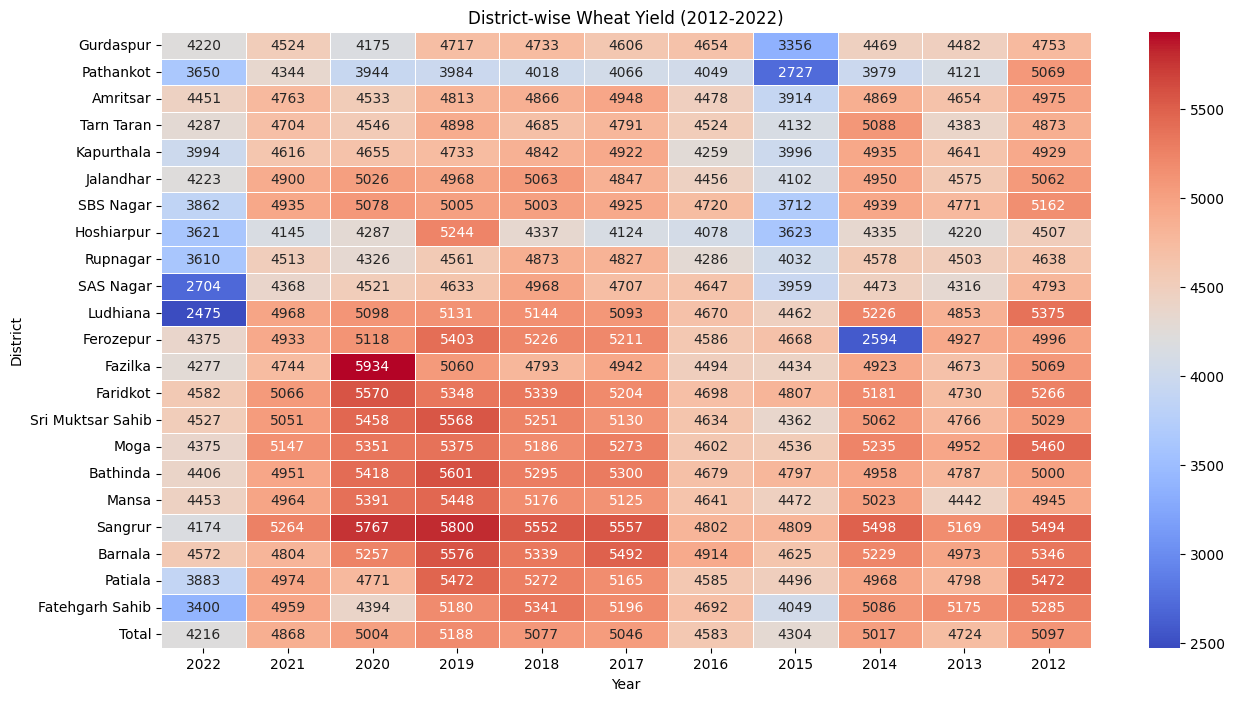

In [22]:
plt.figure(figsize=(15, 8))
# sns.heatmap(df_10yrs.set_index("District/Year"), cmap="coolwarm", fmt=".0f", linewidths=0.5)
sns.heatmap(df_10yrs.set_index("District/Year"), cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.title("District-wise Wheat Yield (2012-2022)")
plt.xlabel("Year")
plt.ylabel("District")
plt.show()

In [23]:
df_10yrs.sort_values(by="2022", ascending=False).head(5)

,District/Year,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
13,Faridkot,4582,5066,5570,5348,5339,5204,4698,4807,5181,4730,5266.0
19,Barnala,4572,4804,5257,5576,5339,5492,4914,4625,5229,4973,5346.0
14,Sri Muktsar Sahib,4527,5051,5458,5568,5251,5130,4634,4362,5062,4766,5029.0
17,Mansa,4453,4964,5391,5448,5176,5125,4641,4472,5023,4442,4945.0
2,Amritsar,4451,4763,4533,4813,4866,4948,4478,3914,4869,4654,4975.0


In [24]:
df_10yrs.sort_values(by="2022", ascending=True).head(5)

,District/Year,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
10,Ludhiana,2475,4968,5098,5131,5144,5093,4670,4462,5226,4853,5375.0
9,SAS Nagar,2704,4368,4521,4633,4968,4707,4647,3959,4473,4316,4793.0
21,Fatehgarh Sahib,3400,4959,4394,5180,5341,5196,4692,4049,5086,5175,5285.0
8,Rupnagar,3610,4513,4326,4561,4873,4827,4286,4032,4578,4503,4638.0
7,Hoshiarpur,3621,4145,4287,5244,4337,4124,4078,3623,4335,4220,4507.0


In [25]:
top_5_districts = df_10yrs.sort_values(by="2022", ascending=True).head(5)["District/Year"].unique()

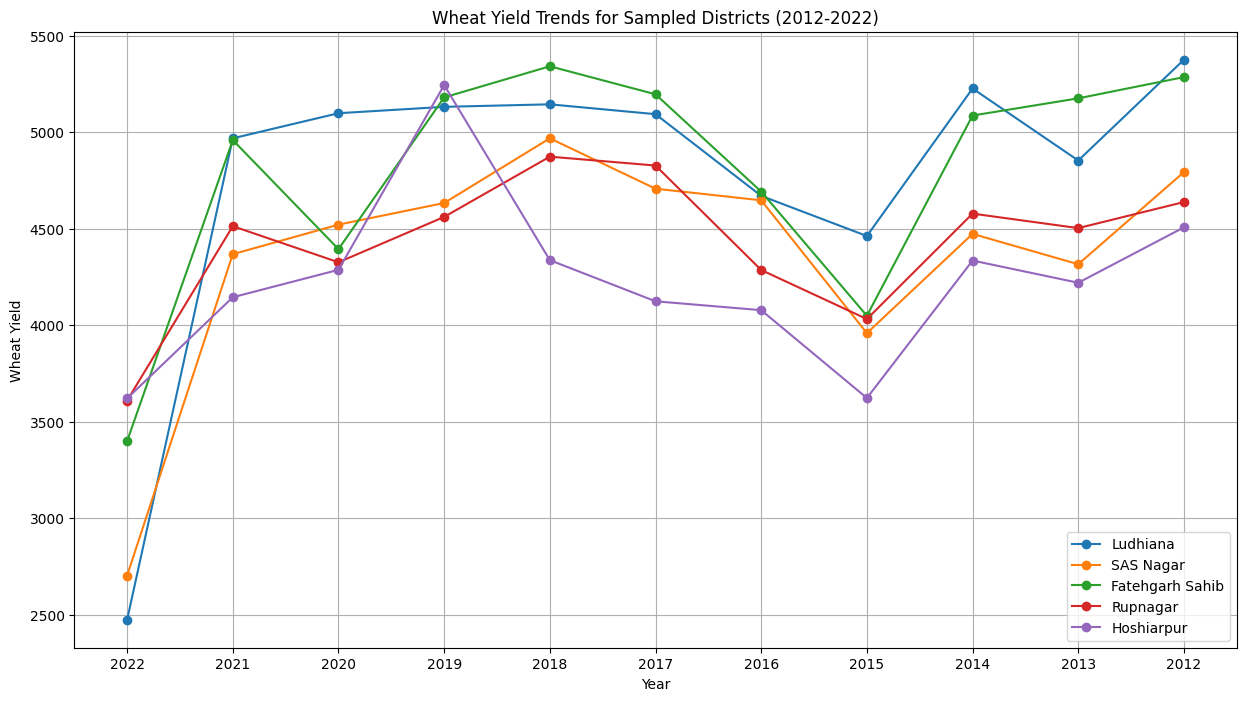

In [26]:
plt.figure(figsize=(15, 8))

for district in top_5_districts:
    district_data = df_10yrs[df_10yrs["District/Year"] == district]
    plt.plot(district_data.columns[1:], district_data.values.flatten()[1:], marker="o", label=district)

plt.xlabel("Year")
plt.ylabel("Wheat Yield")
plt.title("Wheat Yield Trends for Sampled Districts (2012-2022)")
plt.legend()
plt.grid()
plt.show()

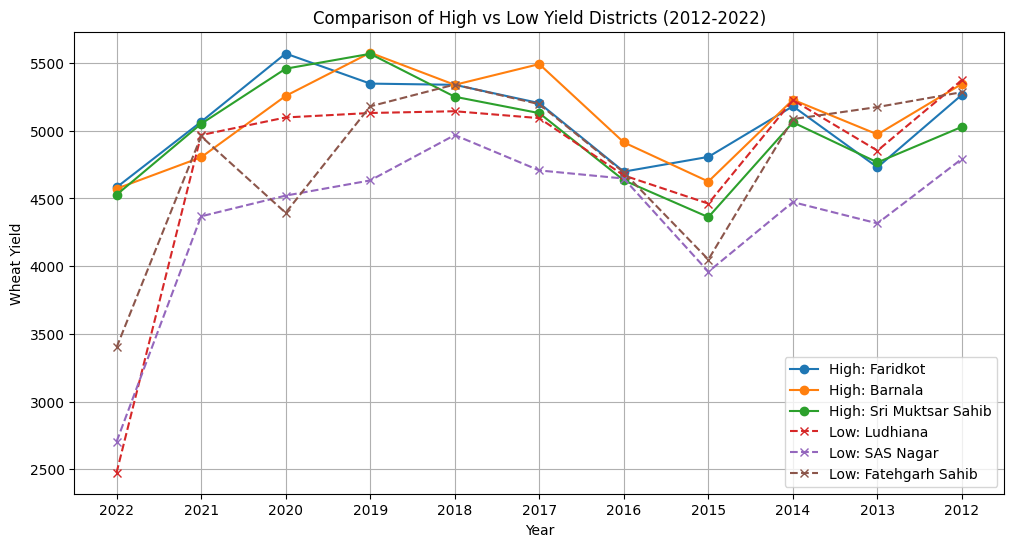

In [27]:
high_districts = df_10yrs.sort_values("2022", ascending=False).head(3)
low_districts = df_10yrs.sort_values("2022", ascending=True).head(3)

plt.figure(figsize=(12, 6))
for district in high_districts["District/Year"]:
    plt.plot(df_10yrs.columns[1:], df_10yrs[df_10yrs["District/Year"] == district].values.flatten()[1:], marker="o", linestyle="-", label=f"High: {district}")

for district in low_districts["District/Year"]:
    plt.plot(df_10yrs.columns[1:], df_10yrs[df_10yrs["District/Year"] == district].values.flatten()[1:], marker="x", linestyle="--", label=f"Low: {district}")

plt.xlabel("Year")
plt.ylabel("Wheat Yield")
plt.title("Comparison of High vs Low Yield Districts (2012-2022)")
plt.legend()
plt.grid()
plt.show()